<h2> DATA 115: Introduction to Data Analytics </h2>
<h3> Week 9. Multiple Regression in Python </h3>
<h3> <i> Gani Nurmukhametov </i></h3>

In [26]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set visualization style
sns.set(style="whitegrid")

In [28]:
# Load Advertising data
advertising_data = pd.read_csv('advertising.csv')

# Display the first few rows of the dataframe
advertising_data .head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [30]:
# Summary/Description of the dataframe
advertising_data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


<Figure size 1000x600 with 0 Axes>

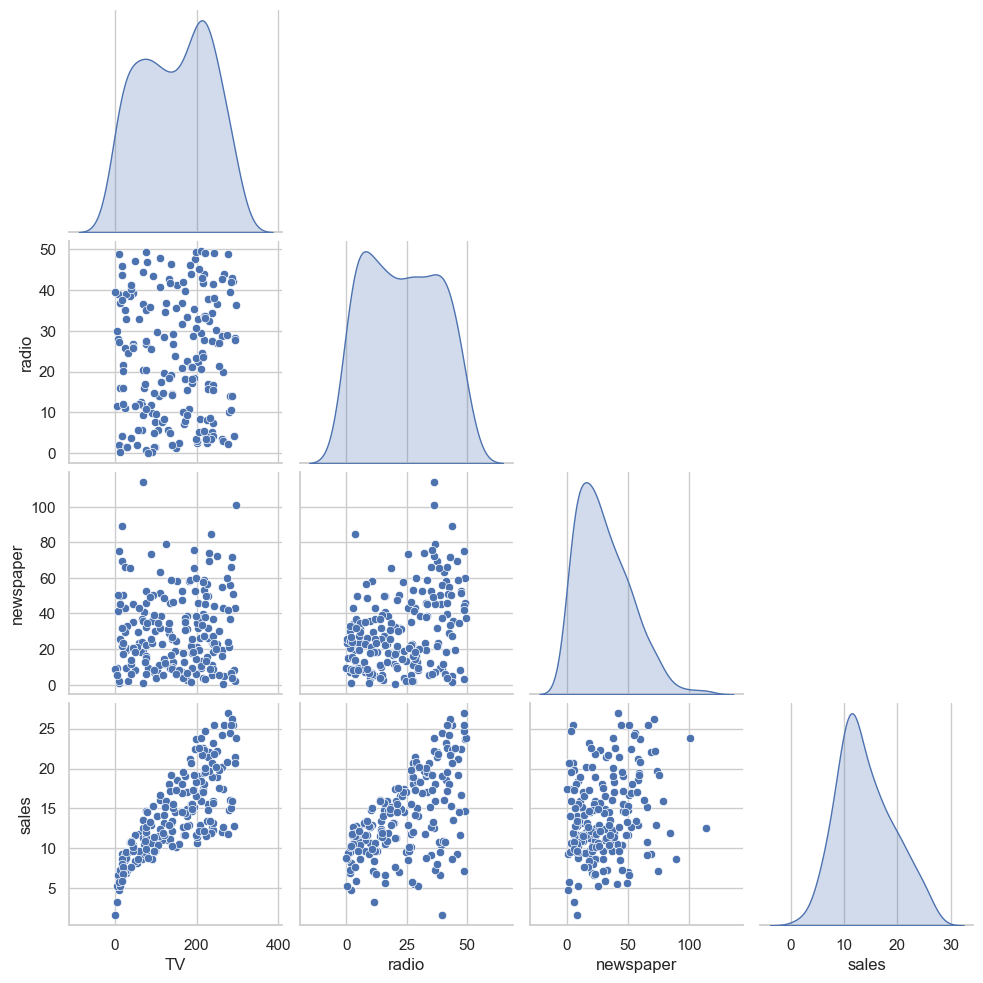

In [32]:
plt.figure(figsize=(10, 6))
sns.pairplot(advertising_data[["TV", "radio", "newspaper", "sales"]], diag_kind="kde", corner=True)
plt.show()

In [34]:
# Print the matrix of correlation coefficients
corr_matrix = advertising_data[["TV", "radio", "newspaper", "sales"]].corr()
print(corr_matrix)

                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000


In [36]:
# Fit a multiple linear regression model
X = advertising_data[['TV', 'radio', 'newspaper']]
y = advertising_data['sales']
model = LinearRegression().fit(X, y)

## Multiple Regression

Now, we will build a multiple linear regression model using `TV`, `radio`, and `newspapers` as predictors for the `sales` response variable.

In [38]:
# Define the predictors (X) and the response (y) variable
X = advertising_data[['TV', 'radio', 'newspaper']] 
y = advertising_data['sales']  

# Add a constant term (intercept) to the predictors
X = sm.add_constant(X)

# Fit the multiple regression model
mult_model = sm.OLS(y, X).fit()

# Print the summary of the model
print(mult_model.summary())

# Extract model details
coefficients = mult_model.params
fitted_values = mult_model.fittedvalues
residuals = mult_model.resid

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.58e-96
Time:                        16:43:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Thus, the regression equation can be written as (I will carry three decimals for the equation coefficients):

$$ \textrm{sales}_i = 2.9389 + 0.0458* \textrm{TV}_i + 0.1885* \textrm{radio}_i - 0.0010*\textrm{newspaper}_i$$

The regression model has somewhat moderate value for the coefficient of determination, $R^2$ value of 0.875.

We can make predictions using this model by inputting new values for our predictor variables:

In [43]:
# Predicting using the fitted model
new_data = pd.DataFrame({
    'TV': [200, 300],
    'radio': [50, 75],
    'newspaper': [100, 50]
})

# Add constant (intercept) to the new data
new_data = sm.add_constant(new_data)

# Predict using the model
predictions = mult_model.predict(new_data)
print(predictions)

# Manual predictions using the formula
manual_pred_1 = 2.9389 + 0.0458 * 200 + 0.1885 * 50 - 0.0010 * 100
manual_pred_2 = 2.9389 + 0.0458 * 300 + 0.1885 * 75 - 0.0010 * 50

print(f"Manual prediction 1: {manual_pred_1}")
print(f"Manual prediction 2: {manual_pred_2}")

0    21.41457
1    30.75616
dtype: float64
Manual prediction 1: 21.4239
Manual prediction 2: 30.766399999999997


## Residual Analysis

Once the model is fit, it is important to check the residuals to validate the assumptions of linear regression.

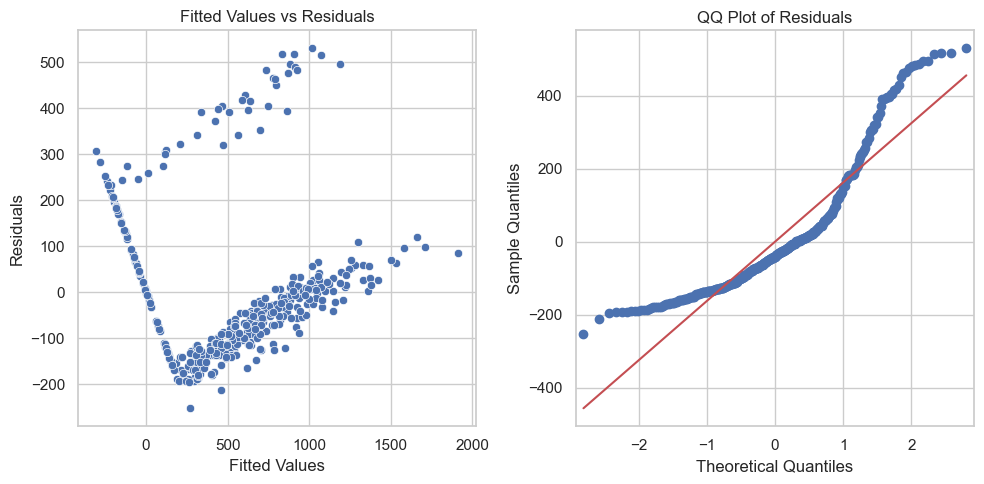

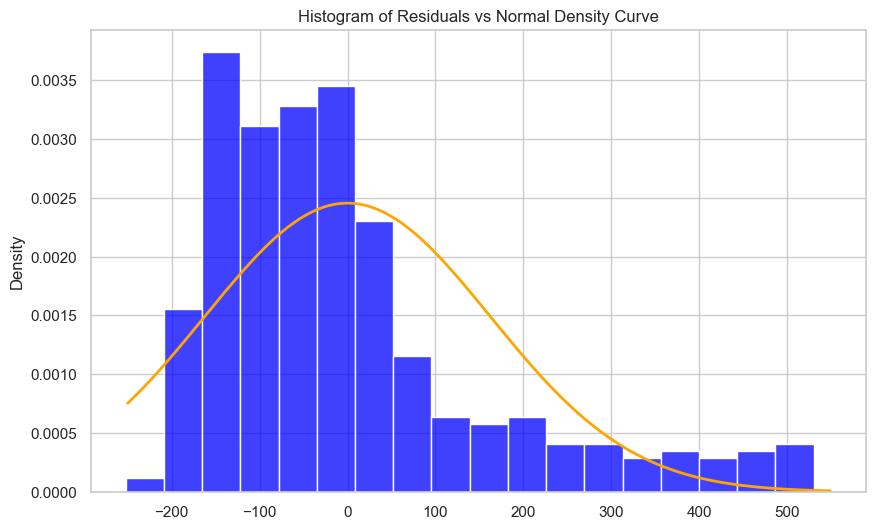

<Figure size 640x480 with 0 Axes>

In [9]:
# Extract model details
fitted_values = mult_model.fittedvalues
residuals = mult_model.resid

# Diagnostic plots for the new model
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Residuals vs Fitted plot
sns.scatterplot(x=fitted_values, y=residuals, ax=axs[0])
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Fitted Values vs Residuals')

# QQ plot for normality of residuals
sm.qqplot(residuals, line='s', ax=axs[1])
axs[1].set_title('QQ Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

# Generate xs and ys for the normal distribution (to plot)
xs = np.arange(-250, 550, 1)  
residuals_mean = residuals.mean()
residuals_std = residuals.std()
ys = norm.pdf(xs, residuals_mean, residuals_std)
# Create a DataFrame for the density line
df = pd.DataFrame({'x': xs, 'y': ys})

# Plot the histogram and normal distirubtion densitiy 
plt.figure(figsize=(10, 6))
sns.histplot(residuals, stat='density', color='blue')
plt.plot(df['x'], df['y'], color='orange', linewidth=2)
plt.title('Histogram of Residuals vs Normal Density Curve')
plt.show()

plt.tight_layout()
plt.show()




There are some potential issues with this model. Let's dive in a little further to see what might be going on. The fitted values vs. residuals plot has some odd structure, so let's take a look at some of the original scatterplots to see what might be going on, as well as extracting the corresponding rows from the dataframe.

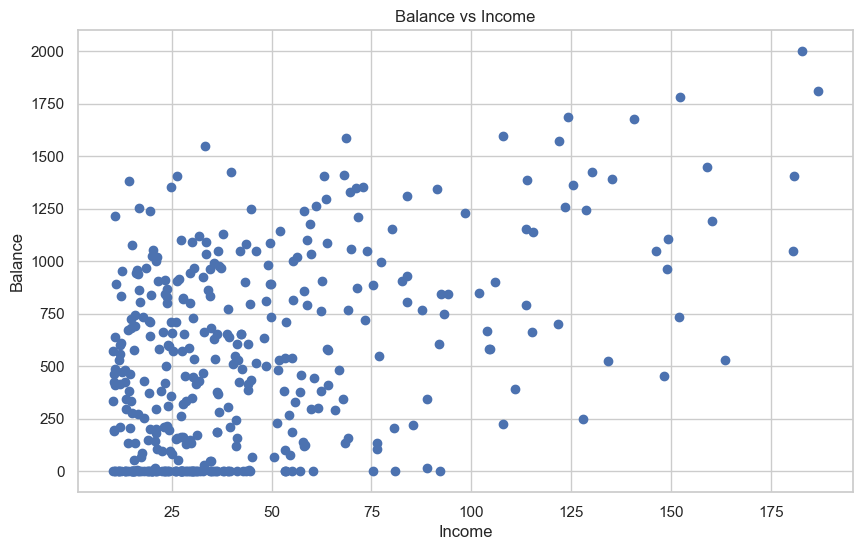

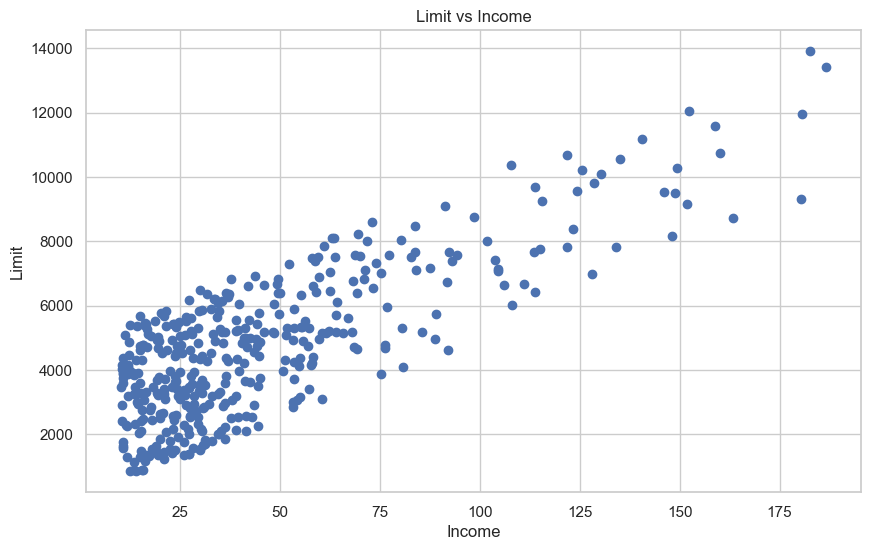

In [10]:
# Plot Balance vs Income Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(credit_data['Income'], credit_data['Balance'])
plt.title('Balance vs Income')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.show()

# Plot Limit vs Income Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(credit_data['Income'], credit_data['Limit'])
plt.title('Limit vs Income')
plt.xlabel('Income')
plt.ylabel('Limit')
plt.show()

In [11]:
# Filter rows based on residuals and fitted values
credit_filtered_data = credit_data[(mult_model.resid > 0) & (mult_model.resid < 100) & (mult_model.fittedvalues < 0)]
credit_filtered_data.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
24,25,10.742,1757,156,3,57,15,Female,No,No,Caucasian,0
48,49,44.522,2252,205,6,72,15,Male,No,Yes,Asian,0
116,117,35.177,2117,186,3,62,16,Female,No,No,Caucasian,0
118,119,27.039,2161,173,3,40,17,Female,No,No,Caucasian,0
131,132,10.726,1568,162,5,46,19,Male,No,Yes,Asian,0


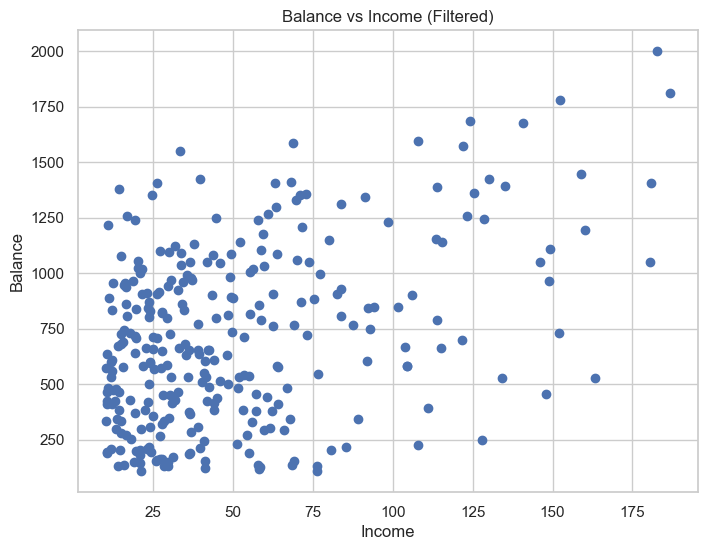

In [12]:
# Filter rows where Balance is greater than 100
credit_balance = credit_data[credit_data['Balance'] > 100]

# Scatter plot of Balance vs Income
plt.figure(figsize=(8, 6))
plt.scatter(credit_balance['Income'], credit_balance['Balance'])
plt.title('Balance vs Income (Filtered)')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     467.2
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          2.76e-110
Time:                        18:10:07   Log-Likelihood:                -1902.3
No. Observations:                 292   AIC:                             3813.
Df Residuals:                     288   BIC:                             3827.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -582.5143     39.781    -14.643      0.0

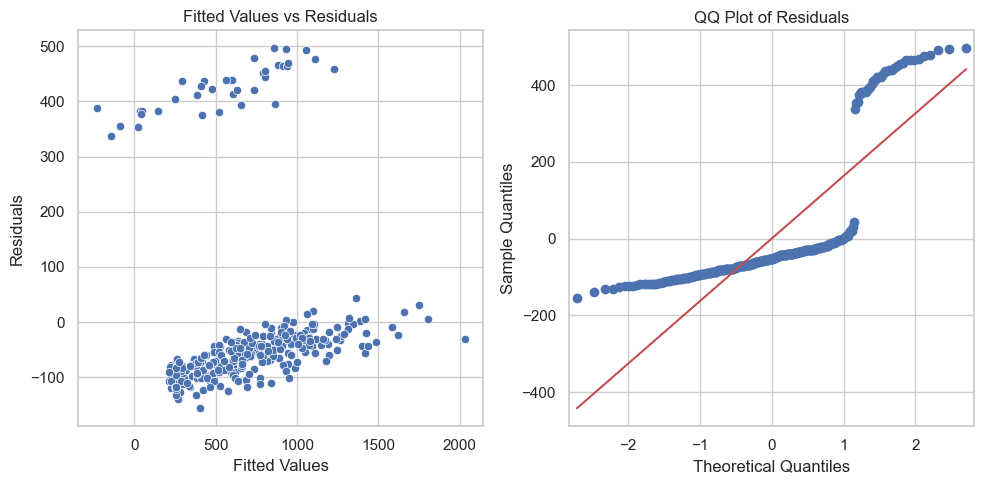

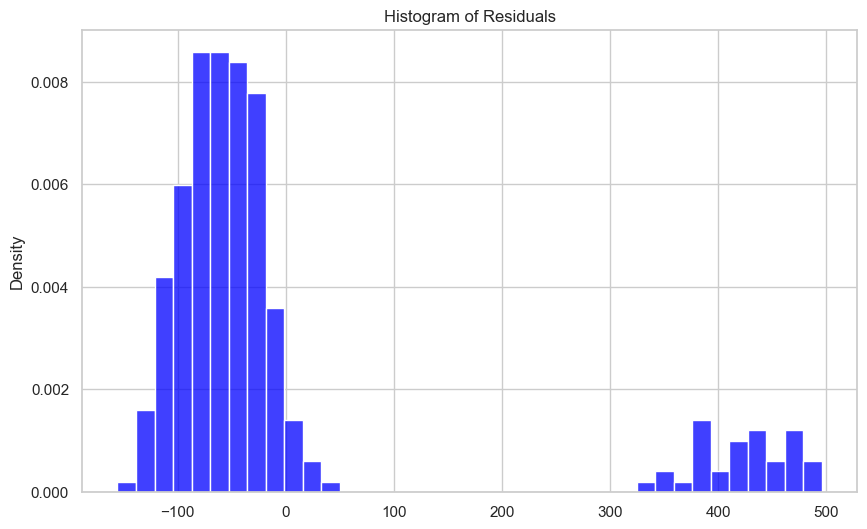

<Figure size 640x480 with 0 Axes>

In [13]:
# Fit a multiple regression model on the filtered data
X_filtered = credit_balance[['Cards', 'Income', 'Limit']]
y_filtered = credit_balance['Balance']
X_filtered = sm.add_constant(X_filtered)

# Fit the model
creditb_bcil = sm.OLS(y_filtered, X_filtered).fit()

# Print the summary of the new model
print(creditb_bcil.summary())

# Extract model details
fitted_values = creditb_bcil.fittedvalues
residuals = creditb_bcil.resid

# Diagnostic plots for the new model
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Residuals vs Fitted plot
sns.scatterplot(x=fitted_values, y=residuals, ax=axs[0])
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Fitted Values vs Residuals')

# QQ plot for normality of residuals
sm.qqplot(residuals, line='s', ax=axs[1])
axs[1].set_title('QQ Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

# Plot the histogram (since it is bimodal, no need to plot the normal density curve)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, stat='density', color='blue')
plt.title('Histogram of Residuals')
plt.show()

plt.tight_layout()
plt.show()

In [14]:
# Filter the credit_balance dataset where residuals are greater than 200, and make a copy
credit2 = credit_balance[creditb_bcil.resid > 200].copy()

# Convert the 'Student' column to a categorical type
credit2['fstudent'] = credit2['Student'].astype('category')

# Display the first few rows of the filtered dataset
print(credit2.head())

# Display a summary of the 'fstudent' column (count of each category)
print(credit2['fstudent'].value_counts())

# Display a table of 'Student' values in the credit_balance dataset
print(credit_balance['Student'].value_counts())


    Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
1            2  106.025   6645     483      3   82         15  Female     Yes   
9           10   71.061   6819     491      3   41         19  Female     Yes   
26          27   42.471   3625     289      6   44         12  Female     Yes   
35          36   23.350   2558     220      3   49         12  Female     Yes   
41          42  113.659   7659     538      2   66         15    Male     Yes   

   Married         Ethnicity  Balance fstudent  
1      Yes             Asian      903      Yes  
9      Yes  African American     1350      Yes  
26      No         Caucasian      654      Yes  
35      No         Caucasian      419      Yes  
41     Yes  African American     1155      Yes  
fstudent
Yes    36
Name: count, dtype: int64
Student
No     256
Yes     36
Name: count, dtype: int64


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.967e+04
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          7.99e-321
Time:                        18:10:07   Log-Likelihood:                -1131.7
No. Observations:                 256   AIC:                             2271.
Df Residuals:                     252   BIC:                             2286.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -749.3412      5.420   -138.261      0.0

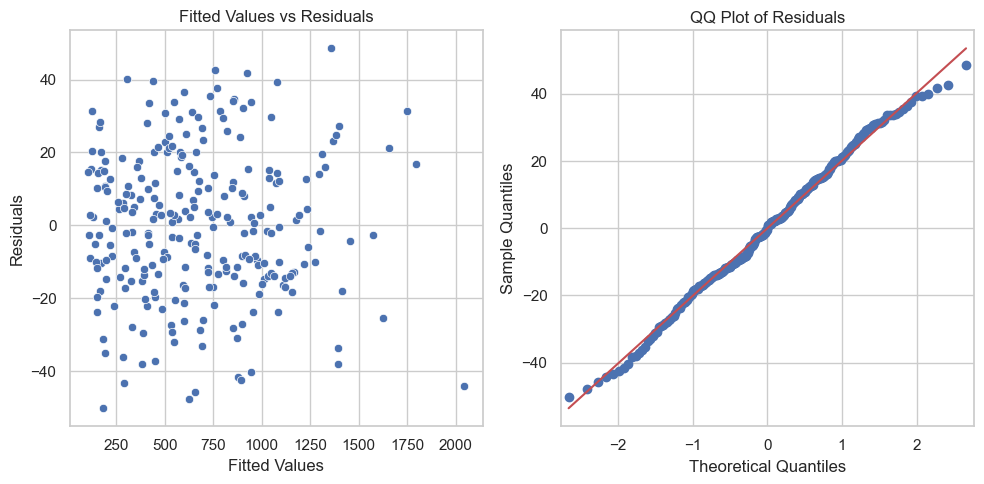

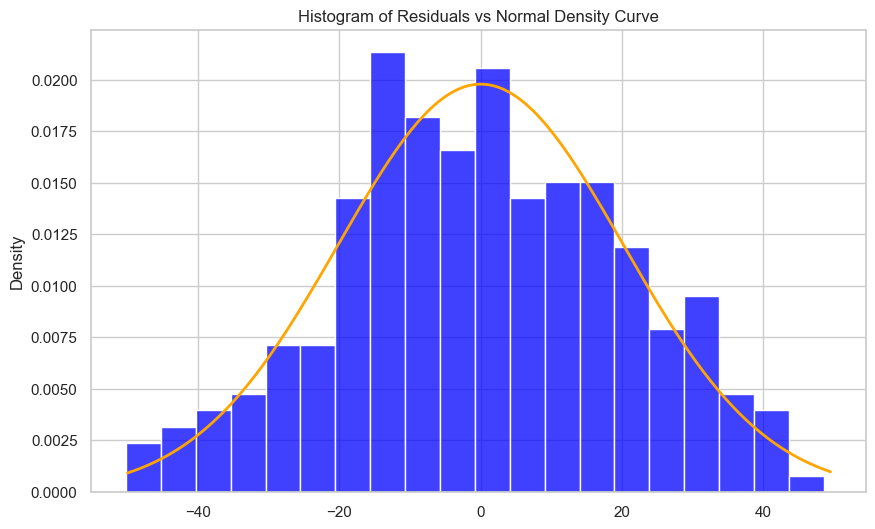

<Figure size 640x480 with 0 Axes>

In [15]:
# Since it appears the outliers are students, we can either restrict the underlying data set to exclude them, 
# or include student as a categorical dummy variable for the model

# Filter the dataset where Balance > 100 and Student == "No"
credit_balance_nos = credit_data[(credit_data['Balance'] > 100) & (credit_data['Student'] == "No")]

# Fit a multiple regression model
X_nos = credit_balance_nos[['Cards', 'Income', 'Limit']]
y_nos = credit_balance_nos['Balance']
X_nos = sm.add_constant(X_nos)

# Fit the model
creditbs_bcil = sm.OLS(y_nos, X_nos).fit()

# Print the summary of the model
print(creditbs_bcil.summary())

# Extract model details
fitted_values = creditbs_bcil.fittedvalues
residuals = creditbs_bcil.resid

# Diagnostic plots for the new model
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Residuals vs Fitted plot
sns.scatterplot(x=fitted_values, y=residuals, ax=axs[0])
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Fitted Values vs Residuals')

# QQ plot for normality of residuals
sm.qqplot(residuals, line='s', ax=axs[1])
axs[1].set_title('QQ Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

# Generate xs and ys for the normal distribution (to plot)
xs = np.arange(-50, 50, 0.5)  
residuals_mean = residuals.mean()
residuals_std = residuals.std()
ys = norm.pdf(xs, residuals_mean, residuals_std)
# Create a DataFrame for the density line
df = pd.DataFrame({'x': xs, 'y': ys})

# Plot the histogram and normal distirubtion densitiy 
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, stat='density', color='blue')
plt.plot(df['x'], df['y'], color='orange', linewidth=2)
plt.title('Histogram of Residuals vs Normal Density Curve')
plt.show()

plt.tight_layout()
plt.show()

In [16]:
# Fit a multiple regression model on the filtered data with a categorical variable 
X_with_student = credit_balance[['Cards', 'Income', 'Limit', 'Student']]
y_with_student = credit_balance['Balance']

# Add a constant term (intercept) to the predictors
X_with_student = sm.add_constant(X_with_student)

# Create a numerical indicator ("dummy:) variable and replace the old categorical variable with its values (0/1)
X_with_student['Student']=X_with_student.Student.map({'No':0,'Yes':1})
X_with_student.head()

,const,Cards,Income,Limit,Student
0,1.0,2,14.891,3606,0
1,1.0,3,106.025,6645,1
2,1.0,4,104.593,7075,0
3,1.0,3,148.924,9504,0
4,1.0,2,55.882,4897,0


                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 2.871e+04
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:10:08   Log-Likelihood:                -1285.5
No. Observations:                 292   AIC:                             2581.
Df Residuals:                     287   BIC:                             2599.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -751.5383      4.970   -151.210      0.0

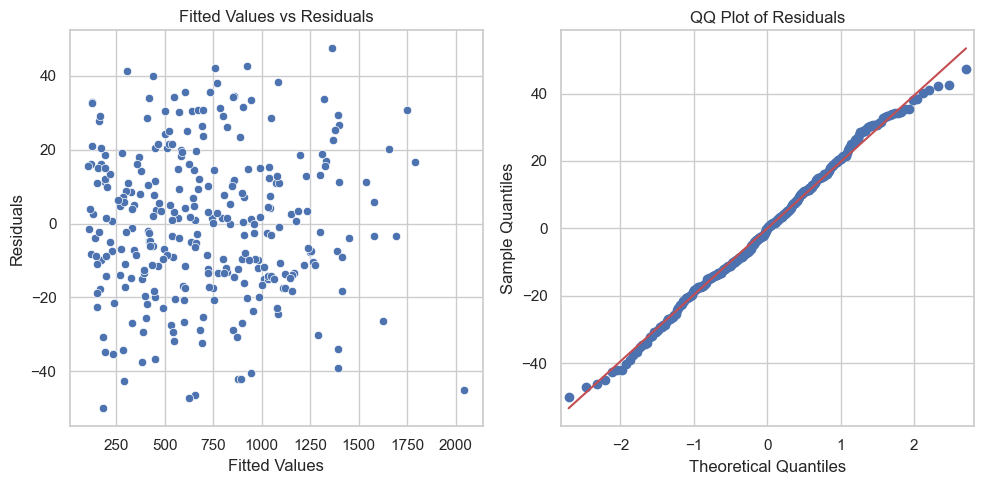

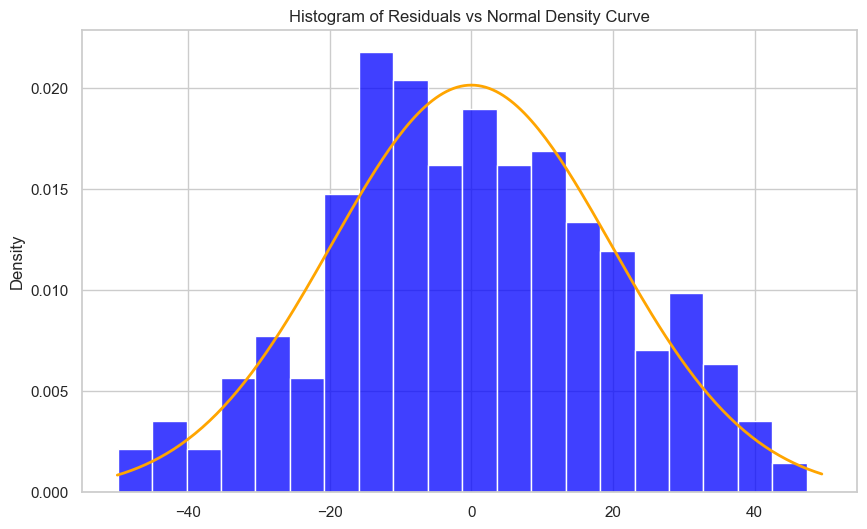

<Figure size 640x480 with 0 Axes>

In [17]:
# Fit the regression model
creditb_bcils = sm.OLS(y_with_student, X_with_student).fit()

# Print the summary of the model
print(creditb_bcils.summary())

# Print the summary of the model
print(creditbs_bcil.summary())

# Extract model details
fitted_values = creditb_bcils.fittedvalues
residuals = creditb_bcils.resid

# Diagnostic plots for the new model
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Residuals vs Fitted plot
sns.scatterplot(x=fitted_values, y=residuals, ax=axs[0])
axs[0].set_xlabel('Fitted Values')
axs[0].set_ylabel('Residuals')
axs[0].set_title('Fitted Values vs Residuals')

# QQ plot for normality of residuals
sm.qqplot(residuals, line='s', ax=axs[1])
axs[1].set_title('QQ Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

# Generate xs and ys for the normal distribution (to plot)
xs = np.arange(-50, 50, 0.5)  
residuals_mean = residuals.mean()
residuals_std = residuals.std()
ys = norm.pdf(xs, residuals_mean, residuals_std)
# Create a DataFrame for the density line
df = pd.DataFrame({'x': xs, 'y': ys})

# Plot the histogram and normal distirubtion densitiy 
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=20, stat='density', color='blue')
plt.plot(df['x'], df['y'], color='orange', linewidth=2)
plt.title('Histogram of Residuals vs Normal Density Curve')
plt.show()

plt.tight_layout()
plt.show()

## Transforming variables

Let's consider some data that does not look linear, and check what will happen if we apply linear regression to that data. 

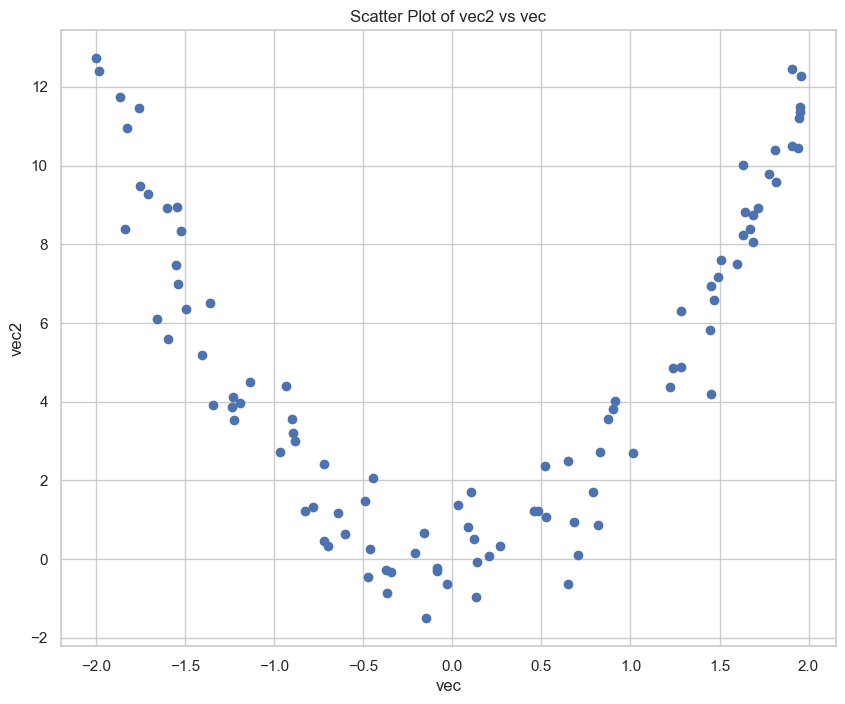

In [18]:
# Generate random data series
vec = np.random.uniform(-2, 2, 100)

# Generate another data series that takes the first series as an argument (squares it) and accounts for the randomness too 
vec2 = 3 * vec**2 + np.random.normal(0, 1, 100)

# Scatterplot of two data series: vec2 vs vec
plt.figure(figsize=(10, 8))
plt.scatter(vec, vec2)
plt.title('Scatter Plot of vec2 vs vec')
plt.xlabel('vec')
plt.ylabel('vec2')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.112
Date:                Thu, 17 Oct 2024   Prob (F-statistic):              0.149
Time:                        18:10:09   Log-Likelihood:                -280.69
No. Observations:                 100   AIC:                             565.4
Df Residuals:                      98   BIC:                             570.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7055      0.405     11.606      0.0

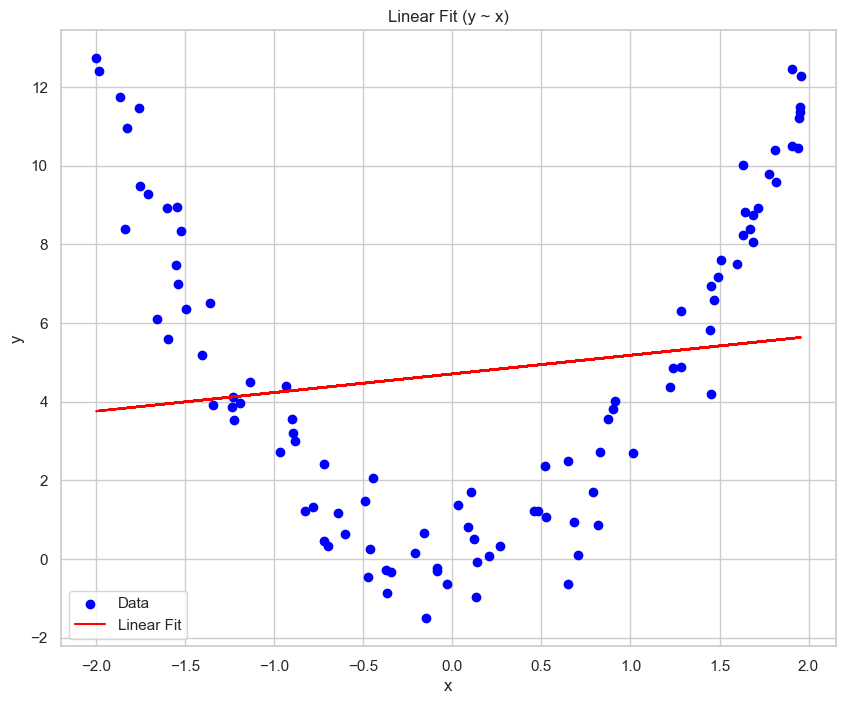

In [19]:
# Create a dataFrame storing two created variables 
synth_df = pd.DataFrame({'x': vec, 'xsquared': vec**2, 'y': vec2})

# Fit a linear regression model (y ~ x)
X_linear = sm.add_constant(synth_df['x'])  # Adding a constant for the intercept
linear_model = sm.OLS(synth_df['y'], X_linear).fit()
print(linear_model.summary())

# Plot the linear model
plt.figure(figsize=(10, 8))
plt.scatter(synth_df['x'], synth_df['y'], color='blue', label='Data')
plt.plot(synth_df['x'], linear_model.fittedvalues, color='red', label='Linear Fit')
plt.title('Linear Fit (y ~ x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# As you can see below, the linear regression is a really poor fit for this quadratic data (as expected): 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1626.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           7.83e-63
Time:                        18:10:09   Log-Likelihood:                -138.38
No. Observations:                 100   AIC:                             280.8
Df Residuals:                      98   BIC:                             286.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0042      0.153     -0.027      0.9

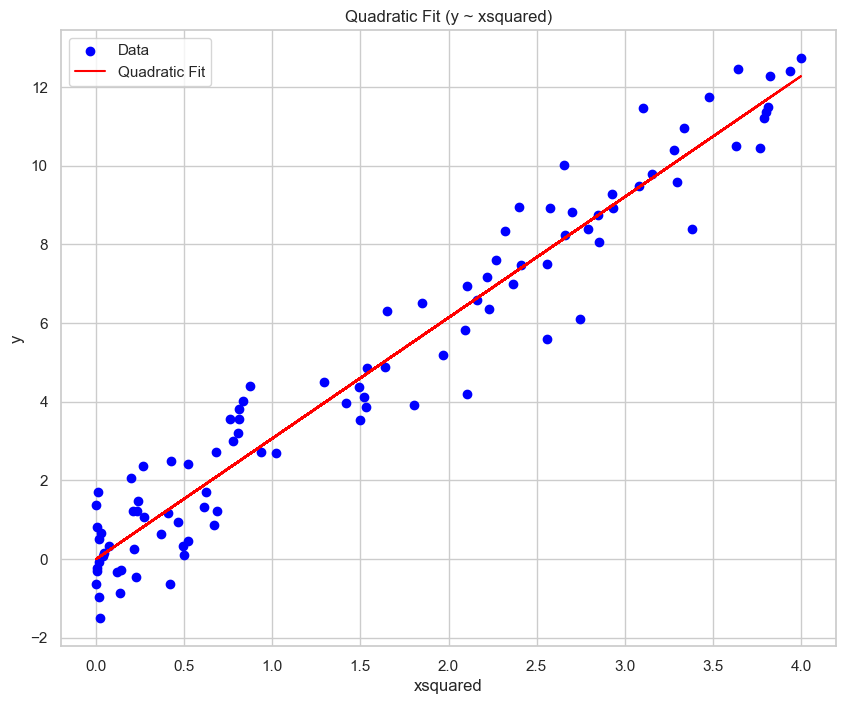

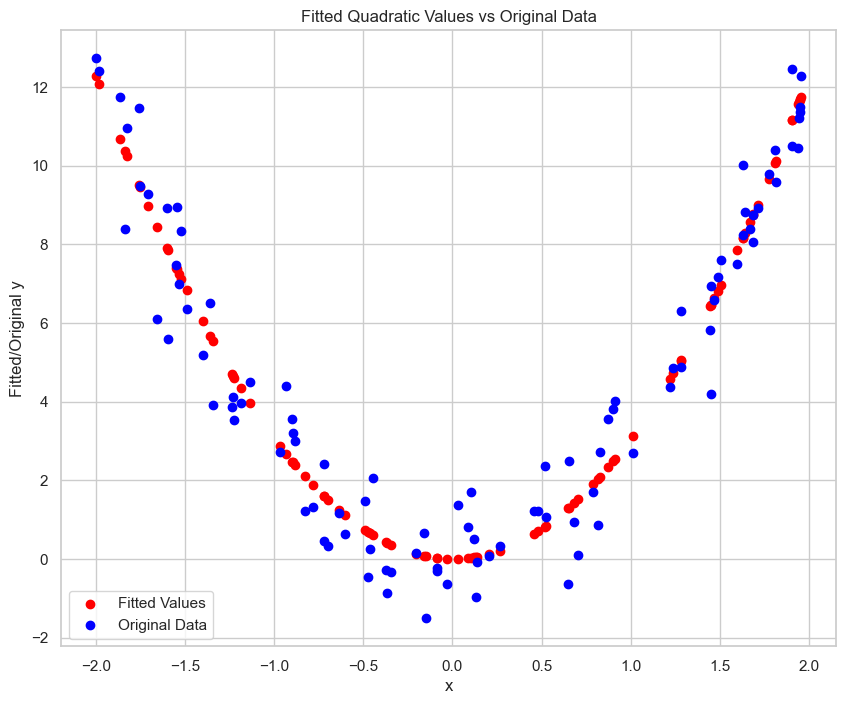

In [20]:
# Fit a quadratic model (y ~ xsquared)
X_quad = sm.add_constant(synth_df['xsquared'])  # Adding a constant for the intercept
quad_model = sm.OLS(synth_df['y'], X_quad).fit()
print(quad_model.summary())
# As you can see below that the fit of this model is much better

# Plot the quadratic model
plt.figure(figsize=(10, 8))
plt.scatter(synth_df['xsquared'], synth_df['y'], color='blue', label='Data')
plt.plot(synth_df['xsquared'], quad_model.fittedvalues, color='red', label='Quadratic Fit')
plt.title('Quadratic Fit (y ~ xsquared)')
plt.xlabel('xsquared')
plt.ylabel('y')
plt.legend()
plt.show()

# Plot fitted quadratic values vs x
plt.figure(figsize=(10, 8))
plt.scatter(synth_df['x'], quad_model.fittedvalues, color='red', label='Fitted Values')
plt.scatter(vec, vec2, color='blue', label='Original Data')
plt.title('Fitted Quadratic Values vs Original Data')
plt.xlabel('x')
plt.ylabel('Fitted/Original y')
plt.legend()
plt.show()